# In this notebook we will learn how to build a simple NN
* With wrapper from nn (easy but less flexible)
* Using module to construct our own NN (flexible enough)

In [2]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import Parameter, functional as F

In [ ]:
# What is a 'Parameter'? 
Parameter?? # required_grad = true (Default)

### Diff between nn.linear vs. F.linear

In [10]:
# What about a 'nn.Linear'?
nn.Linear?? #class

In [ ]:
F.linear?? #returns output, also diff signtures

In [13]:
! pip install git+https://github.com/szagoruyko/pytorchviz
! brew install graphviz  # or ! sudo apt-get install graphviz

  Cloning https://github.com/szagoruyko/pytorchviz to /private/var/folders/6z/zbv2cxb942lb1ldxq3_zdn040000gn/T/pip-a8dhmtqy-build
  Running setup.py install for pytorchviz ... done
Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
amber                      go-statik                  mpir
auditbeat                  gocryptfs                  nyx
augustus                   hlint                      opencascade
ballerina                  hmmer                      orocos-kdl
bareos-client              jdupes                     plank
bedops                     kallisto                   qtkeychain
bioawk                     krakend                    shelltestrunner
blast                      kumo                       shogun
bwa                        libbitcoin-consensus       sickle
container-diff             libccd                     skafos
coreos-ct                  libjwt                     tmux-xpanes
darksky-weather            libt

==> Deleted Formulae
antlr@3                                  juju@1.25
apache-spark@1.5                         kubernetes-cli@1.3
apache-spark@1.6                         laszip@2
autoconf@2.64                            ledger@2.6
automake@1.12                            libmpc@0.8
azure-cli@1                              libpng@1.2
bazel@0.2                                libpqxx@3
clang-format@3.8                         libxml2@2.7
cloog@0.15                               litmus
cloudbees-sdk                            logstash@2.4
docker@1.11                              logstash@5.6
docker@1.71                              mg3a
eigen@3.2                                moodbar
gcc@4.6                                  mpfr@2
gcc@4.7                                  mvptree
gcc@4.8                                  open-mpi@1.6
glfw@2                                   otto
gmp@4                                    pcap_dnsproxy
go@1.5                                   percona-server

In [1]:
from collections import OrderedDict
from torchviz import make_dot, make_dot_from_trace

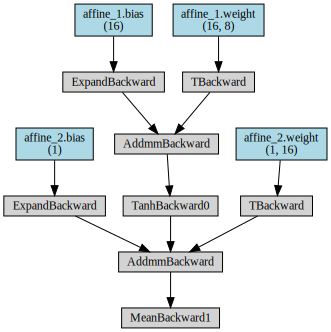

In [3]:
# Building a sequential net, using wrapper
model1 = nn.Sequential(OrderedDict([
    ('affine_1',nn.Linear(8,16)),
    ('tanh', nn.Tanh()),
    ('affine_2', nn.Linear(16,1)),
]))

x= Variable(torch.randn(1,8))
y = model1(x)
make_dot(y.mean(), params=dict(model1.named_parameters()))

In [7]:
# Building custom sequential net
class Model2(nn.Module):
    def __init__(self,n,d,K):
        super().__init__()
        self.affine1 = nn.Linear(n, d)
        self.affine2 = nn.Linear(d, K)
    def forward(self, x):
        x = self.affine1(x)
        x = F.tanh(x)
        x= self.affine2(x)
        return x
model2 = Model2(8,16,1)    

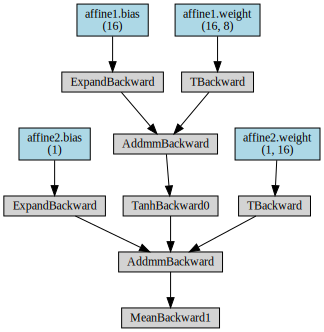

In [8]:
x = Variable(torch.randn(1,8))
y = model2(x)
make_dot(y.mean(), params=dict(model2.named_parameters()))